<a href="https://colab.research.google.com/github/JunRepos/Capstone_AI/blob/main/%EC%BA%A1%EC%8A%A4%ED%86%A4_%ED%92%88%EC%A7%88_%EA%B2%80%EC%A6%9D_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%ED%94%84%EB%A1%9C%ED%86%A0%ED%83%80%EC%9E%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
!pip install -r requirements.txt  # install

Cloning into 'yolov5'...
remote: Enumerating objects: 14298, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 14298 (delta 61), reused 70 (delta 35), pack-reused 14194
Receiving objects: 100% (14298/14298), 13.33 MiB | 7.20 MiB/s, done.
Resolving deltas: 100% (9873/9873), done.
/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 35.8 MB/s 


In [3]:
from glob import glob

# 이미지 경로 list로 넣기
train_img_list = glob('/content/drive/MyDrive/CapstoneDataset/train/images/*.jpg')
valid_img_list = glob('/content/drive/MyDrive/CapstoneDataset/valid/images/*.jpg')

# txt 파일에 write
with open('/content/drive/MyDrive/CapstoneDataset/train.txt', 'w') as f:
	f.write('\n'.join(train_img_list) + '\n')
    
with open('/content/drive/MyDrive/CapstoneDataset/valid.txt', 'w') as f:
	f.write('\n'.join(valid_img_list) + '\n')

In [7]:
!python train.py --img 640 --batch 8 --epochs 100 --data /content/drive/MyDrive/CapstoneDataset/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name  /content/drive/MyDrive/CapstoneDataset/midterm_yolov5sBatch8Epoch100

train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/content/drive/MyDrive/CapstoneDataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=/content/drive/MyDrive/CapstoneDataset/midterm_yolov5sBatch8Epoch100, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-203-g6371de8 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box

In [9]:
!python detect.py --source "/content/drive/MyDrive/CapstoneDataset/valid/images/CABLE-bad binding004.jpg" --weights "/content/drive/MyDrive/CapstoneDataset/midterm_yolov5sBatch8Epoch100/weights/best.pt"

detect: weights=['/content/drive/MyDrive/CapstoneDataset/midterm_yolov5sBatch8Epoch100/weights/best.pt'], source=/content/drive/MyDrive/CapstoneDataset/valid/images/CABLE-bad binding004.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-203-g6371de8 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7045186 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /content/drive/MyDrive/CapstoneDataset/valid/images/CABLE-bad binding004.jpg: 640x640 2 CABLE-bad bindings, 12.8ms
Speed: 0.6ms pre-process, 12.8ms inference, 1.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to r

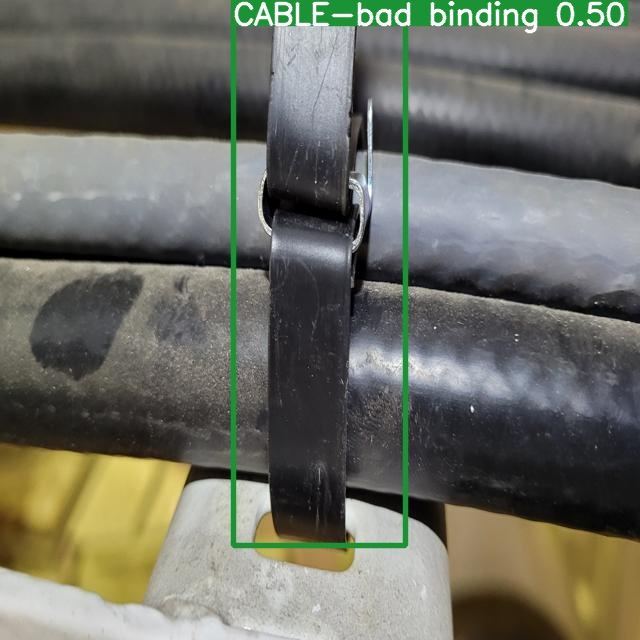

In [11]:
from google.colab.patches import cv2_imshow
import sys
import numpy as np
import cv2

src = cv2.imread('/content/yolov5/runs/detect/exp/CABLE-bad binding003.jpg')

if src is None:
    print('Image load failed!')
    sys.exit()

dst = cv2.bilateralFilter(src, -1, 10, 5)

cv2_imshow(src)
cv2.waitKey()

cv2.destroyAllWindows()